IMPORT LIBRARIES

In [3]:
from __future__ import print_function
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
plt.style.use("ggplot")

from skimage import io
from sklearn.cluster import KMeans

from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets

In [4]:
plt.rcParams['figure.figsize'] = (20, 12)

DATA PREPROCESSING

In [1]:
from google.colab  import files
uploaded = files.upload()

Saving plot_utils.py.zip to plot_utils.py.zip


In [2]:

from google.colab  import files
uploaded = files.upload()

Saving images.zip to images.zip


In [5]:
!unzip images.zip
!unzip plot_utils.py

Archive:  images.zip
  inflating: images/1-Saint-Basils-Cathedral.jpg  
  inflating: images/2-new-york-skyline.jpg  
  inflating: images/3-peacock.jpg    
  inflating: images/4-GoldenGateBridge.jpg  
replace plot_utils.py.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
Archive:  plot_utils.py.zip
  inflating: plot_utils.py           


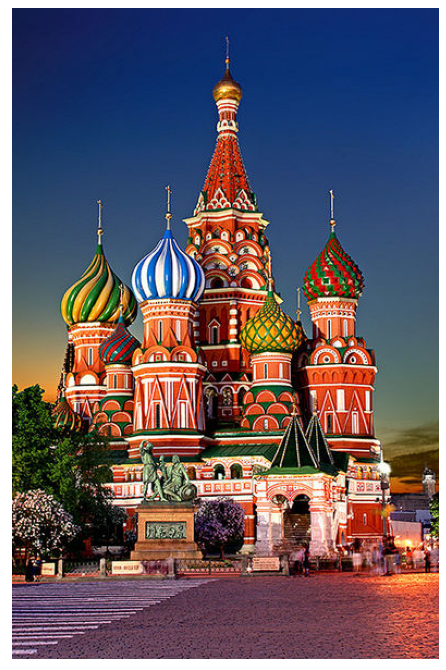

In [6]:
img = io.imread('/content/images/1-Saint-Basils-Cathedral.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(img);


In [7]:
img.shape #600 pixels;394 depth; 3 colored channel(RBG)

(600, 394, 3)

In [8]:
img_data = (img / 255.0).reshape(-1, 3)
img_data.shape      #236400 pixels for all 3 color channels

(236400, 3)

VISUALISING THE COLOR SPACE USING POINT CLOUDS

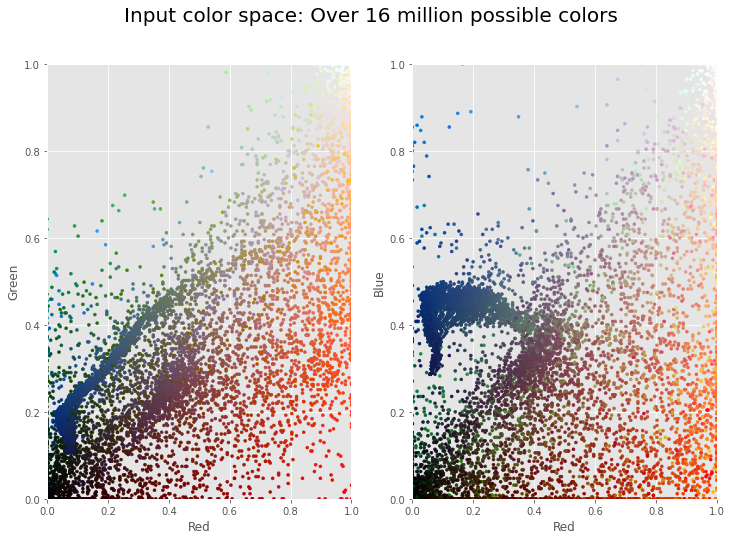

In [15]:
from plot_utils import plot_utils
x = plot_utils(img_data, title='Input color space: Over 16 million possible colors')
x.colorSpace()

VISUALISING THE K-MEANS REDUCED COLOUR SPACE


In [16]:
from sklearn.cluster import MiniBatchKMeans


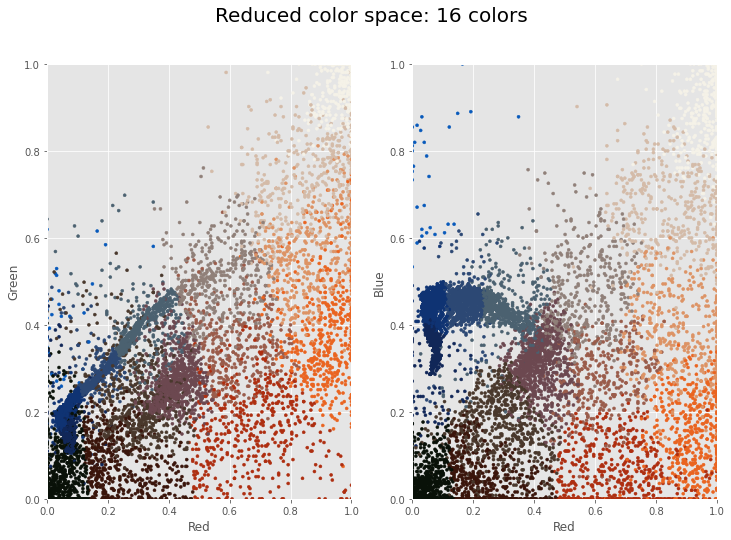

In [17]:
kmeans = MiniBatchKMeans(16).fit(img_data)
k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]

y = plot_utils(img_data, colors=k_colors, title="Reduced color space: 16 colors")
y.colorSpace()

K-MEANS IMAGE COMPRESSION WITH INTERACTIVE CONTROLS

In [18]:
img_dir = 'images/'

In [22]:
@interact
def color_compression(image=os.listdir(img_dir), k=IntSlider(min=1,max=256,steps=1,value=16,
                                                             continuous_update=False,
                                                             layout=dict(width='100%'))):
     input_img = io.imread(img_dir+image)
     img_data = (input_img / 255.0).reshape(-1, 3)
     
     kmeans = MiniBatchKMeans(k).fit(img_data)
     k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]

     k_img = np.reshape(k_colors, (input_img.shape)) 

     fig, (ax1, ax2) = plt.subplots(1, 2)
     fig.suptitle('k-means Image Compression', fontsize=20)

     ax1.set_title('Compressed')
     ax1.set_xticks([])
     ax1.set_yticks([]) 
     ax1.imshow(k_img)

     ax2.set_title('Original (16,777,216) colors')
     ax2.set_xticks([])
     ax2.set_yticks([]) 
     ax2.imshow(input_img)
     
     plt.subplots_adjust(top=0.85)
     plt.show() 

interactive(children=(Dropdown(description='image', options=('1-Saint-Basils-Cathedral.jpg', '2-new-york-skyli…